In [1]:
import os
import numpy as np
import pandas as pd
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df= pd.read_csv('features.csv')
print('The dimensions of all subjects is:',df.shape)

The dimensions of all subjects is: (25892, 16)


In [3]:
df.sample(5)

,Min_hr,Max_hr,Mean_hr,Men_acc_sqrt,Min_acc_x,Max_acc_x,Mean_acc_x,Min_acc_y,Max_acc_y,Mean_acc_y,Min_acc_z,Max_acc_z,Mean_acc_z,Binary label,Multiple label,ID
15224,58.0,64.0,59.67,0.99,-0.26,-0.25,-0.25,-0.86,-0.85,-0.85,-0.45,-0.43,-0.44,0.0,5.0,18.0
7159,52.0,59.0,57.17,1.00,-0.12,-0.11,-0.11,-0.57,-0.55,-0.56,-0.83,-0.82,-0.82,0.0,5.0,8.0
11076,85.0,86.0,85.50,0.99,-0.25,-0.24,-0.24,-0.28,-0.26,-0.27,-0.93,-0.92,-0.92,1.0,3.0,13.0
15208,63.0,77.0,68.20,0.99,-0.28,-0.23,-0.27,-0.92,-0.84,-0.85,-0.44,-0.32,-0.44,0.0,5.0,18.0
13263,50.0,50.0,50.00,1.00,-0.12,-0.12,-0.12,-0.96,-0.96,-0.96,0.24,0.25,0.24,1.0,2.0,16.0


Balancing the labels  

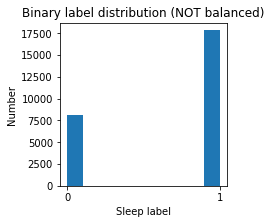

In [4]:
#Binary labels
plt.figure(figsize=(3, 3))
plt.title('Binary label distribution (NOT balanced)')
plt.xlabel("Sleep label")
plt.xticks([0,1])
plt.ylabel("Number")
plt.hist(df['Binary label'])
plt.show()

In [5]:
labels_bin=df['Binary label'] # 0 (0,-1,5) y 1 (1,2,3,4)

lab_0_bin = []
idx_0_bin = []
list_idx_0_bin = []

for l in labels_bin:
    if l==0:
        idx_0_bin.append(True)
    else:
        idx_0_bin.append(False)
list_idx_0_bin.append(df[idx_0_bin])

lab_1_bin = []
idx_1_bin = []
list_idx_1_bin = []

for l in labels_bin:
    if l==1:
        idx_1_bin.append(True)
    else:
        idx_1_bin.append(False)
list_idx_1_bin.append(df[idx_1_bin])

df0_bin = pd.DataFrame()  
for i in range(len(list_idx_0_bin)):
    df0_bin=df0_bin.append(list_idx_0_bin[i])
df1_bin = pd.DataFrame()  
for i in range(len(list_idx_1_bin)):
    df1_bin=df1_bin.append(list_idx_1_bin[i])

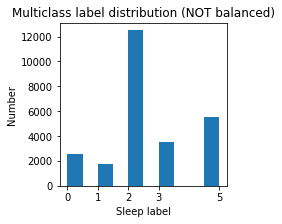

In [6]:
#Multiple label
plt.figure(figsize=(3, 3))
plt.title('Multiclass label distribution (NOT balanced)')
plt.xlabel("Sleep label")
plt.xticks([0,1,2,3,5])
plt.ylabel("Number")
plt.hist(df['Multiple label'])
plt.show()

In [7]:
labels_multi=df['Multiple label'] #0 (-1,0), 1, 2, 3 (3,4), 5

lab_0_multi = []
idx_0_multi = []
list_idx_0_multi = []

for l in labels_multi:
    if l==0:
        idx_0_multi.append(True)
    else:
        idx_0_multi.append(False)
list_idx_0_multi.append(df[idx_0_multi])

lab_1_multi = []
idx_1_multi = []
list_idx_1_multi = []

for l in labels_multi:
    if l==1:
        idx_1_multi.append(True)
    else:
        idx_1_multi.append(False)
list_idx_1_multi.append(df[idx_1_multi])

lab_2_multi = []
idx_2_multi = []
list_idx_2_multi = []

for l in labels_multi:
    if l==2:
        idx_2_multi.append(True)
    else:
        idx_2_multi.append(False)
list_idx_2_multi.append(df[idx_2_multi])

lab_3_multi = []
idx_3_multi = []
list_idx_3_multi = []

for l in labels_multi:
    if l==3:
        idx_3_multi.append(True)
    else:
        idx_3_multi.append(False)
list_idx_3_multi.append(df[idx_3_multi])

lab_5_multi = []
idx_5_multi = []
list_idx_5_multi = []

for l in labels_multi:
    if l==5:
        idx_5_multi.append(True)
    else:
        idx_5_multi.append(False)
list_idx_5_multi.append(df[idx_5_multi])


df0_multi = pd.DataFrame()  
for i in range(len(list_idx_0_multi)):
    df0_multi=df0_multi.append(list_idx_0_multi[i])
df1_multi = pd.DataFrame()  
for i in range(len(list_idx_1_multi)):
    df1_multi=df1_multi.append(list_idx_1_multi[i])
df2_multi = pd.DataFrame()  
for i in range(len(list_idx_2_multi)):
    df2_multi=df2_multi.append(list_idx_2_multi[i])
df3_multi = pd.DataFrame()  
for i in range(len(list_idx_3_multi)):
    df3_multi=df3_multi.append(list_idx_3_multi[i])
df5_multi = pd.DataFrame()  
for i in range(len(list_idx_5_multi)):
    df5_multi=df5_multi.append(list_idx_5_multi[i])

In [8]:
n_lab_binarias=[df0_bin['Binary label'].value_counts()[0],df1_bin['Binary label'].value_counts()[1]]

n_lab_multiclase=[df0_multi['Multiple label'].value_counts()[0],df1_multi['Multiple label'].value_counts()[1],
      df2_multi['Multiple label'].value_counts()[2],df3_multi['Multiple label'].value_counts()[3],
      df5_multi['Multiple label'].value_counts()[5]]
n_lab=min([min(n_lab_binarias),min(n_lab_multiclase)])

print('\n','Binary:',n_lab_binarias,'\n','Multiple:',n_lab_multiclase,'\n','Minimum:',n_lab,'\n')


 Binary: [8099, 17793] 
 Multiple: [2554, 1762, 12486, 3545, 5545] 
 Minimum: 1762 



Create two different dataframes: one with the balanced multiclass label data (df_multi_balanced) and the other with the balanced binary label data (df_bin_balanced). All classes (both binary and multiclass) have been balanced to the minimum number of labels of the two types.

In [9]:
n_lab_bin=600 # We restrict the number of samples in each class due to computational capacity
df_bin_balanced = pd.DataFrame()
df_bin_balanced=df_bin_balanced.append(df0_bin.sample(n_lab_bin)).append(df1_bin.sample(n_lab_bin))
print('The dimensions of the feature with balanced binary labels is:',df_bin_balanced.shape)

n_lab_multi=200
df_multi_balanced = pd.DataFrame()
df_multi_balanced=df_multi_balanced.append(df0_multi.sample(n_lab_multi)).append(df1_multi.sample(n_lab_multi)).append(df2_multi.sample(n_lab_multi)).append(df3_multi.sample(n_lab_multi)).append(df5_multi.sample(n_lab_multi))
print('The dimensions of the feature with balanced maultiple labels is:',df_multi_balanced.shape)

The dimensions of the feature with balanced binary labels is: (1200, 16)
The dimensions of the feature with balanced maultiple labels is: (1000, 16)
